# Import libs

In [35]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import PIL
import cv2

import pathlib
import matplotlib.pyplot as plt

# Load Dataset
Download Flowers dataset from googleapis

In [6]:
dataset_url ="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", 
                                   origin=dataset_url,
                                   cache_dir=".",
                                   untar=True)

228827136/228813984 [==============================] - 199s 1us/step


# Proprocess
<ol>
    <li>Use pathlib to convert paths to OS objects</li>
    <li>Build dictionaries for images path, labels </li>
    <li>Resize the images to resolution (180,180) </li>
    <li>Convert X,y to numpy array</li>
    <li>Split the data into train , test</li>
    <li>Scale the X dataset</li>
</ol>

In [7]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [8]:
roses = list(data_dir.glob('roses/*'))

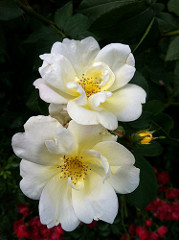

In [9]:
PIL.Image.open(roses[0])

In [10]:
flowers_path_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),    
}

In [16]:
flowers_indices_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4, 
}

In [60]:
flowers_labels_dict = {
    0 : 'roses' ,
    1 : 'daisy',
    2 : 'dandelion',
    3 : 'sunflowers',
    4 : 'tulips'
}

In [29]:
X , y = [] , []

for flower,image_paths in flowers_path_dict.items() :
    for image_path in image_paths:
        img = cv2.imread(str(image_path))
        img = cv2.resize(img, (180,180))
        
        X.append(img)
        y.append(flowers_indices_dict[flower])

In [33]:
X = np.array(X)
y = np.array(y)

In [42]:
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [43]:
X_train.shape

(2936, 180, 180, 3)

In [44]:
y_train.shape

(2936,)

In [45]:
X_test.shape

(734, 180, 180, 3)

In [46]:
y_test.shape

(734,)

In [47]:
X_train = X_train / 255
X_test = X_test / 255

# CNN Model - Build, Compile, Fit, Evaluate
Layers:
<ol>
    <li>Conv2D</li>
    <li>MaxPooling2D</li>
    <li>Conv2D</li>
    <li>MaxPooling2D</li>
    <li>Conv2D</li>
    <li>MaxPooling2D</li>
    <li>Flatten</li>
    <li>Dense</li>
    <li>Dense</li>
<ol>

In [53]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 75s 809ms/step - loss: 1.3762 - accuracy: 0.4281
Epoch 2/30
92/92 [==============================] - 68s 739ms/step - loss: 0.9830 - accuracy: 0.6233
Epoch 3/30
92/92 [==============================] - 64s 695ms/step - loss: 0.7659 - accuracy: 0.7105
Epoch 4/30
92/92 [==============================] - 52s 561ms/step - loss: 0.5639 - accuracy: 0.7878
Epoch 5/30
92/92 [==============================] - 51s 558ms/step - loss: 0.3554 - accuracy: 0.8750
Epoch 6/30
92/92 [==============================] - 52s 561ms/step - loss: 0.2179 - accuracy: 0.9298
Epoch 7/30
92/92 [==============================] - 52s 565ms/step - loss: 0.1214 - accuracy: 0.9632
Epoch 8/30
92/92 [==============================] - 51s 559ms/step - loss: 0.0705 - accuracy: 0.9792
Epoch 9/30
92/92 [==============================] - 50s 544ms/step - loss: 0.0551 - accuracy: 0.9854
Epoch 10/30
92/92 [==============================] - 49s 528ms/step - loss: 0.0185 - accura

In [54]:
model.evaluate(X_test, y_test)

C:\Users\I301903\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 3s 115ms/step - loss: 2.9502 - accuracy: 0.6553


[2.950209379196167, 0.6553133726119995]

In [55]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.10448562e-02, 5.39771467e-03, 1.04698563e-06, 9.30431664e-01,
        5.31246662e-02],
       [1.20516305e-11, 7.61881470e-14, 9.83271093e-06, 9.99990225e-01,
        9.56786625e-13],
       [1.54691690e-03, 4.65632009e-04, 1.70851536e-06, 8.89870107e-01,
        1.08115584e-01],
       [3.46299743e-07, 7.92517142e-07, 9.96239305e-01, 4.13158705e-05,
        3.71817336e-03],
       [2.67972738e-01, 7.06103623e-01, 1.15393575e-13, 2.76105094e-13,
        2.59236228e-02]], dtype=float32)

In [56]:
y_pred = [np.argmax(x) for x in y_pred]
y_pred[:5]

[3, 3, 3, 2, 1]

In [57]:
y_test[:5]

array([0, 3, 4, 1, 1])

Text(0.5, 0, 'sunflowers')

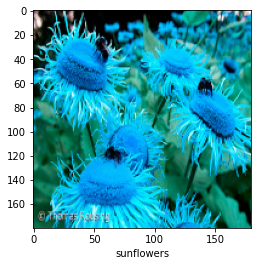

In [61]:
plt.imshow(X_test[1])
plt.xlabel(flowers_labels_dict[y_pred[1]])

Text(0.5, 0, 'dandelion')

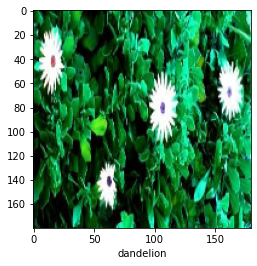

In [62]:
plt.imshow(X_test[3])
plt.xlabel(flowers_labels_dict[y_pred[3]])

In [63]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
